# Undersampling e Oversampling

Desbalanceamento de dados é um problema muito comum nos conjuntos de dados. Duas possíveis soluções são a subamostragem (undersampling) aleatória e a superamostragem (oversampling) aleatória. O exemplo a seguir mostra um exemplo simples de como isso pode ser feito utilizando a biblioteca Pandas.

---

## Exploração inicial dos dados:

Criando conjunto de dados artificial, desbalanceado:

array([[<AxesSubplot:title={'center':'idade'}>,
        <AxesSubplot:title={'center':'sexo'}>],
       [<AxesSubplot:title={'center':'altura'}>,
        <AxesSubplot:title={'center':'classe'}>]], dtype=object)

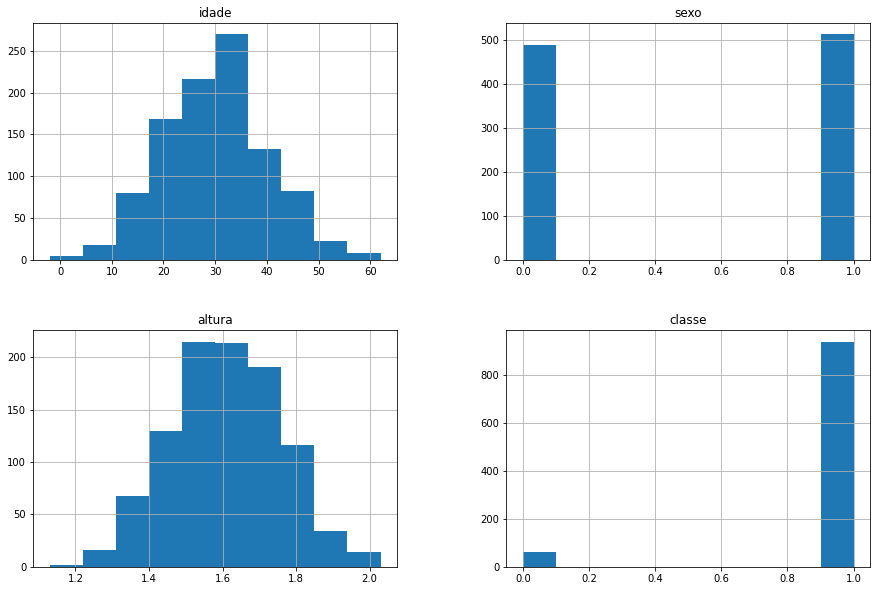

In [24]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# Dados de exemplo
dados = pd.DataFrame({
    'idade': np.round(np.random.normal(loc=30, scale=10, size=1000)),
    'sexo': np.random.choice([0, 1], 1000), # 0 homem, 1 mulher
    'altura': np.round(np.random.normal(loc=1.6, scale=.15, size=1000), 2),
    'classe':  np.random.choice([0, 1], 1000, p=[0.05, 0.95])
    })

plt.rcParams['figure.figsize'] = [15, 10]
dados.hist()

Nota-se um grande desbalanceamento das classes através do histograma da variável alvo `classe`

In [25]:
dados['classe'].value_counts()

1    937
0     63
Name: classe, dtype: int64

A função `value_counts()` confirma o desbalanceamento: há **955** ocorrências da classe 1 e apenas **45** da classe 0.

---

## Superamostragem - Oversampling

Na superamostragem vamos aumentar o número de elementos da classe menos representada.

Primeiro vamos separar as tuplas do nosso conjunto de dados em que a classe é igual à 0:

In [26]:
classe_0 = dados[dados.classe == 0]
classe_0

,idade,sexo,altura,classe
22,31.0,1,1.83,0
42,8.0,1,1.67,0
78,15.0,1,1.59,0
109,31.0,1,1.61,0
154,13.0,1,1.50,0
...,...,...,...,...
919,28.0,0,1.50,0
920,29.0,1,1.37,0
924,50.0,0,1.67,0
935,35.0,1,1.70,0


In [27]:
classe_0.shape

(63, 4)

Agora vamos obter uma amostra de tamanho **955**, para que as classes fiquem igualmente distribuídas. Note que `replace` deve ser true, pois sem repetições não conseguiriamos criar uma amostra da classe `0` maior que **45**:

In [28]:
sample_0 = classe_0.sample(n=955, replace=True)
sample_0

,idade,sexo,altura,classe
494,59.0,0,1.77,0
78,15.0,1,1.59,0
771,9.0,0,1.58,0
799,46.0,0,1.75,0
252,34.0,1,1.71,0
...,...,...,...,...
325,29.0,0,1.74,0
393,26.0,0,1.77,0
494,59.0,0,1.77,0
481,22.0,1,1.33,0


Agora vamos concatenar os dados da nossa amostra com os dados do conjunto original que possuiam classe igual à 1:

array([[<AxesSubplot:title={'center':'idade'}>,
        <AxesSubplot:title={'center':'sexo'}>],
       [<AxesSubplot:title={'center':'altura'}>,
        <AxesSubplot:title={'center':'classe'}>]], dtype=object)

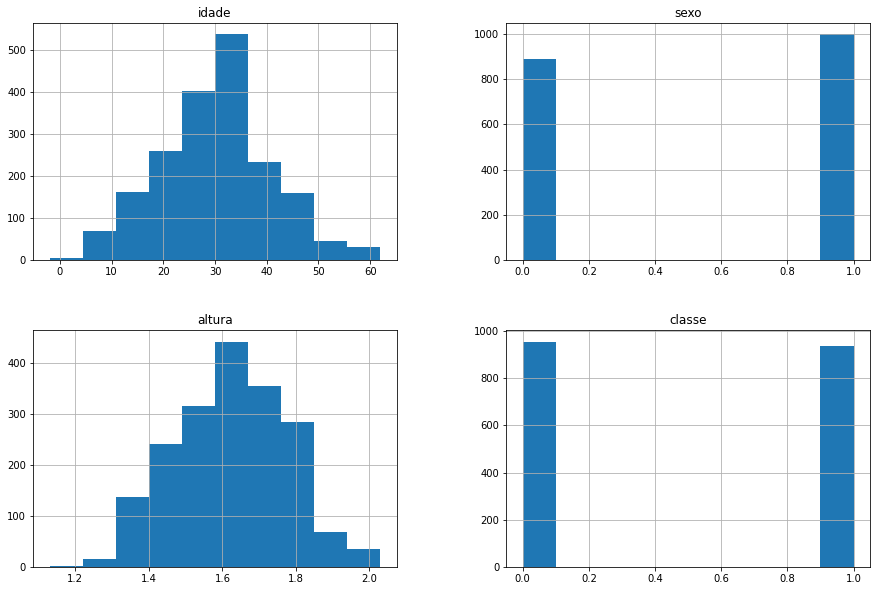

In [29]:
classe_1 = dados[dados.classe == 1]
dados_upsampled = pd.concat([sample_0, classe_1])
dados_upsampled.hist()

Checando a distribuição das classes:

array([[<AxesSubplot:title={'center':'classe'}>]], dtype=object)

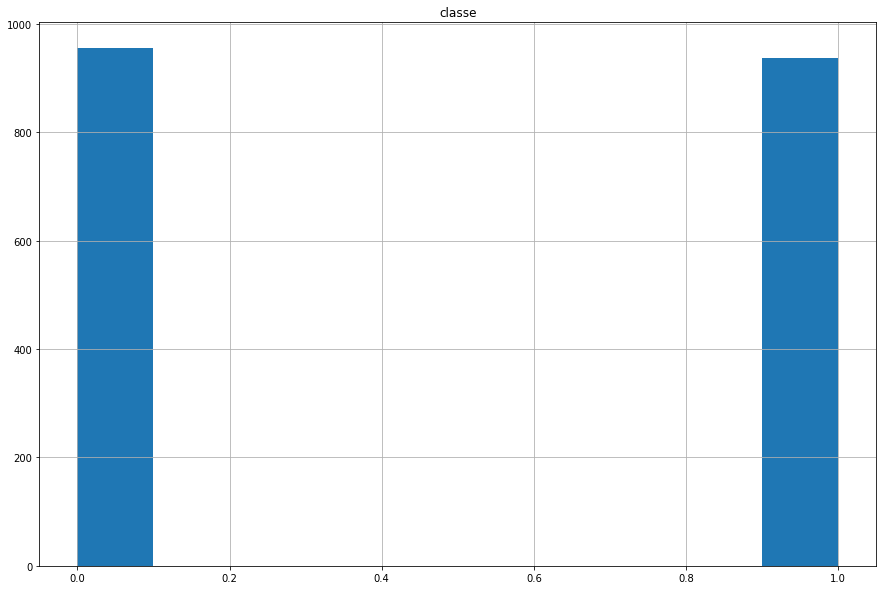

In [30]:
dados_upsampled.hist('classe')

In [31]:
dados_upsampled['classe'].value_counts()

0    955
1    937
Name: classe, dtype: int64

array([[<AxesSubplot:title={'center':'idade'}>,
        <AxesSubplot:title={'center':'sexo'}>],
       [<AxesSubplot:title={'center':'altura'}>,
        <AxesSubplot:title={'center':'classe'}>]], dtype=object)

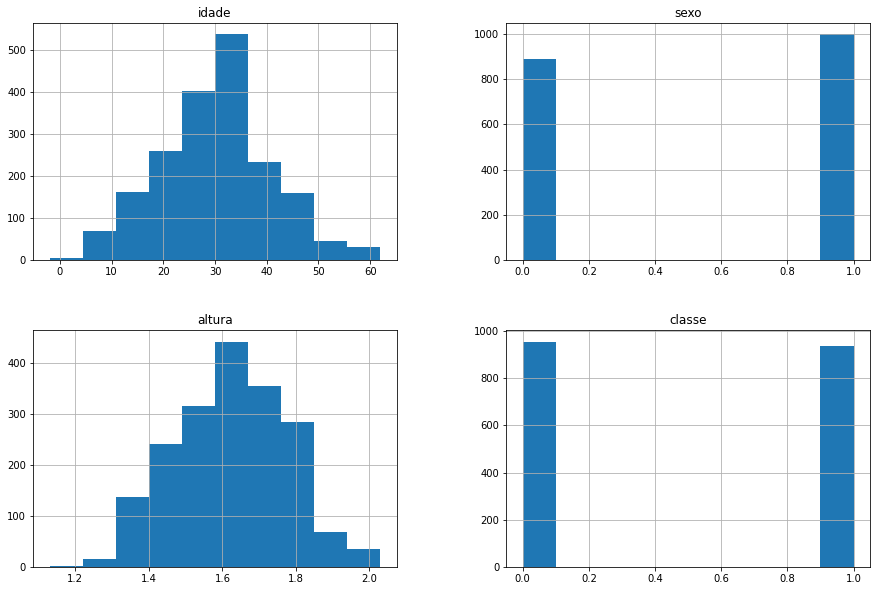

In [32]:
dados_upsampled.hist()



---

## Subamostragem - Undersampling

Para a subamostragem, vamos diminuir o tamanho da classe predominante.

Checando a distribuição das classes nos dados originais:

In [33]:
dados['classe'].value_counts()

1    937
0     63
Name: classe, dtype: int64

Selecionando as tuplas em que a classe é igual à 1:

In [34]:
classe_1 = dados[dados.classe == 1]
classe_1

,idade,sexo,altura,classe
0,15.0,0,1.72,1
1,20.0,1,1.61,1
2,33.0,1,1.51,1
3,36.0,0,1.42,1
4,19.0,1,1.58,1
...,...,...,...,...
995,24.0,0,1.36,1
996,34.0,0,1.50,1
997,25.0,1,1.72,1
998,24.0,0,1.44,1


Obtendo uma amostra de tamanho **45**. Note que, nesse caso, é interessante que nossa amostra possua elementos distintos, por isso `replace=False`:

In [35]:
sample_1 = classe_1.sample(n=45, replace=False)
sample_1

,idade,sexo,altura,classe
69,24.0,1,1.56,1
400,38.0,1,1.67,1
440,45.0,1,1.46,1
430,37.0,1,1.73,1
910,28.0,0,1.70,1
149,41.0,0,1.90,1
90,16.0,0,1.70,1
739,48.0,1,1.78,1
929,25.0,1,1.59,1
803,21.0,1,1.62,1


In [36]:
sample_1.shape

(45, 4)

Agora iremos concatenar a amostra com dados com os dados do conjunto original que possuiam classe igual a `0`:

In [37]:
classe_0 = dados[dados.classe == 0]
dados_downsampled = pd.concat([classe_0, sample_1])

Verificando a distribuição das classes:

array([[<AxesSubplot:title={'center':'classe'}>]], dtype=object)

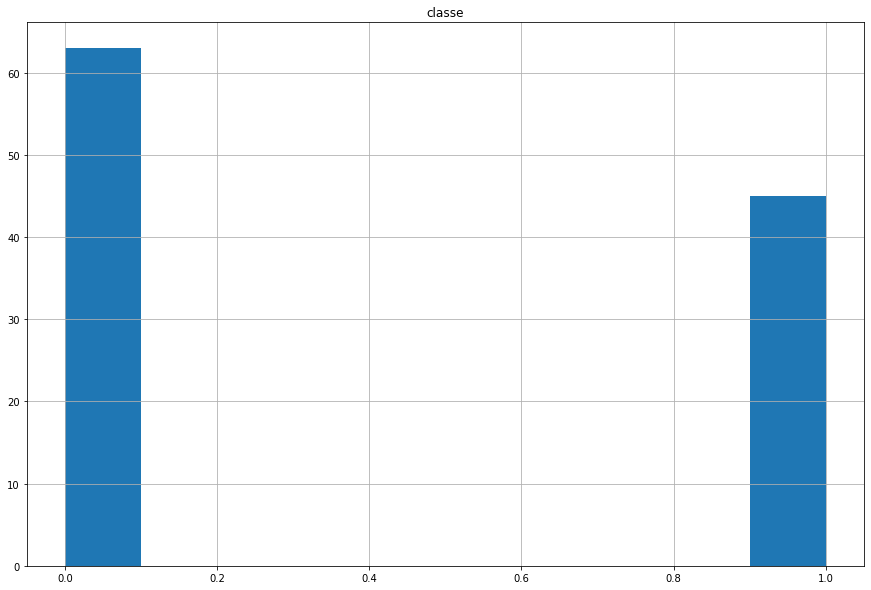

In [38]:
dados_downsampled.hist('classe')

In [39]:
dados_downsampled['classe'].value_counts()

0    63
1    45
Name: classe, dtype: int64

array([[<AxesSubplot:title={'center':'idade'}>,
        <AxesSubplot:title={'center':'sexo'}>],
       [<AxesSubplot:title={'center':'altura'}>,
        <AxesSubplot:title={'center':'classe'}>]], dtype=object)

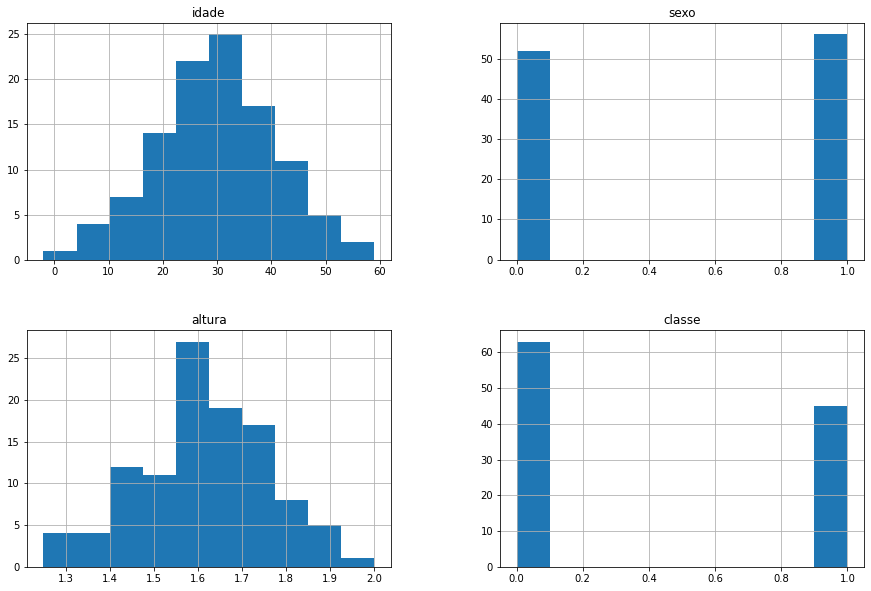

In [40]:
dados_downsampled.hist()

### Fazendo sampling dos exemplos e da classe quando estão em objetos diferentes

(array([ 22,  42,  78, 109, 154, 217, 225, 231, 234, 251, 252, 273, 278,
        288, 291, 325, 333, 334, 341, 350, 358, 374, 387, 393, 398, 406,
        409, 444, 479, 480, 481, 487, 494, 530, 531, 544, 551, 560, 591,
        618, 624, 683, 698, 708, 713, 753, 768, 771, 789, 799, 812, 838,
        843, 856, 867, 873, 886, 894, 919, 920, 924, 935, 988], dtype=int64),)

In [44]:
indices_0 = np.where(dados.classe == 0)[0]
atributos = dados[['altura','sexo', 'idade']].to_numpy()
classes = dados['classe'].to_numpy()

indices_0_sample = np.random.choice(indices_0, size=10, replace=False)

In [49]:
indices_0_sample

array([768, 387, 799, 838, 919, 251, 341, 494, 544, 843], dtype=int64)



---

## Métricas de desempenho em conjuntos desbalanceados

Alguns cuidados são necessários ao medir desempenho em dados não balanceados. Por exemplo, suponha um classificador binário (`Some_classifier`) que sempre classifica uma entrada como a classe predominante do conjunto. Vamos calcular sua acurácia no conjunto de dados inicial:

In [45]:
import numpy as np

# Criando uma classe de classificador de exemplo
class Some_classifier:
  def __init__(self):
    self.predict_value = None
  def fit(self, X, y):
    self.predict_value = y.mode()
  def predict(self, X):
    return np.repeat(1, X.shape[0])

Separando em variáveis de entrada (`X`) e variáveis alvo (`y`) e calculando acurácia padrão:

In [46]:
from sklearn.metrics import accuracy_score

# Separando o conjunto de dados
X, y = dados.iloc[:, :-1], dados.iloc[:, -1]

my_classifier = Some_classifier()
my_classifier.fit(X, y)
y_pred = my_classifier.predict(X)

print("Acurácia do classificador: %.2f%%" % (accuracy_score(y, y_pred)*100))

Acurácia do classificador: 93.70%


A medida de acurácia não representa muito bem o desempenho do nosso classificador.

Material que discute bem diferentes métricas para dados desbalanceados: https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

### Importante: Técnicas de amostragem devem ser feitas no conjunto de treinamento!